# Resume Screening using Machine Learning

This notebook implements resume screening using text preprocessing, TF-IDF vectorization, and a K-Nearest Neighbors classifier wrapped in OneVsRestClassifier.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
resumeDataSet = pd.read_csv('/content/Resume Screening.csv', encoding='utf-8')
resumeDataSet['cleaned_resume'] = ''
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [3]:
# Display distinct categories
print("Displaying the distinct categories of resume:")
print(resumeDataSet['Category'].unique())

print("\nCategory counts:")
print(resumeDataSet['Category'].value_counts())

Displaying the distinct categories of resume:
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']

Category counts:
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO               

<Axes: xlabel='count', ylabel='Category'>

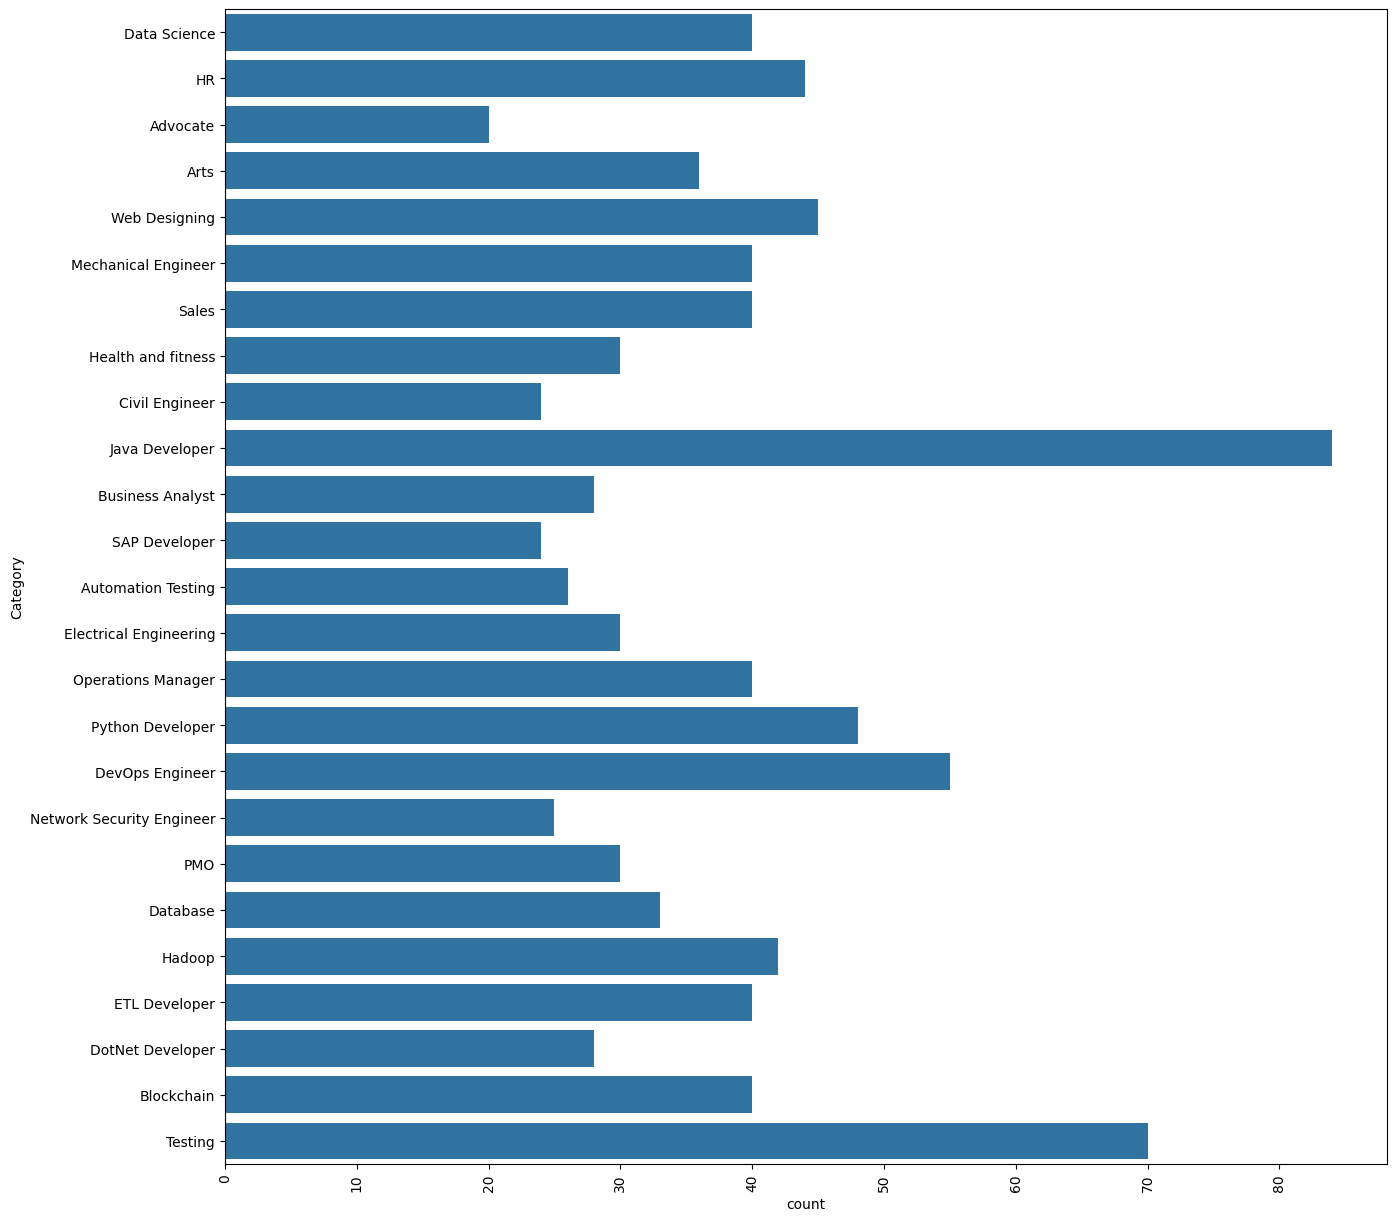

In [4]:
# Visualize category distribution
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=resumeDataSet)

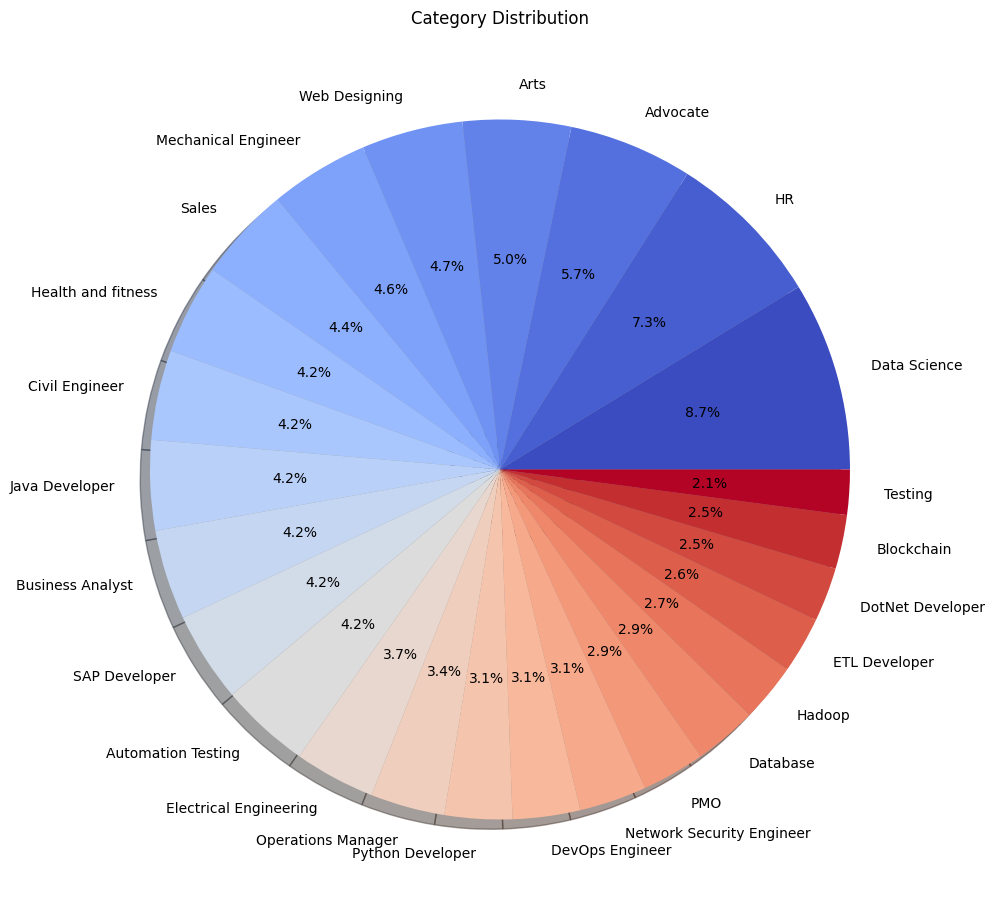

In [5]:
# Pie chart of categories
from matplotlib.gridspec import GridSpec

targetCounts = resumeDataSet["Category"].value_counts()
targetLabels = resumeDataSet["Category"].unique()

plt.figure(1, figsize=(25, 25))
the_grid = GridSpec(2, 2)

cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, len(targetLabels))]
plt.subplot(the_grid[0, 1], aspect=1, title='Category Distribution')
plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [6]:
# Clean resume function
def cleanResume(resumeText):
    resumeText = re.sub(r"http\S+|www\S+|https\S+", ' ', resumeText, flags=re.MULTILINE)
    resumeText = re.sub(r'\@\w+|\#',' ', resumeText)
    resumeText = re.sub(r'[^A-Za-z\s]', ' ', resumeText)
    resumeText = re.sub(r'\s+', ' ', resumeText)
    return resumeText.strip()

In [7]:
# Apply cleaning
resumeDataSet['cleaned_resume'] = resumeDataSet['Resume'].apply(lambda x: cleanResume(str(x)))
resumeDataSet = resumeDataSet.dropna(subset=['cleaned_resume'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


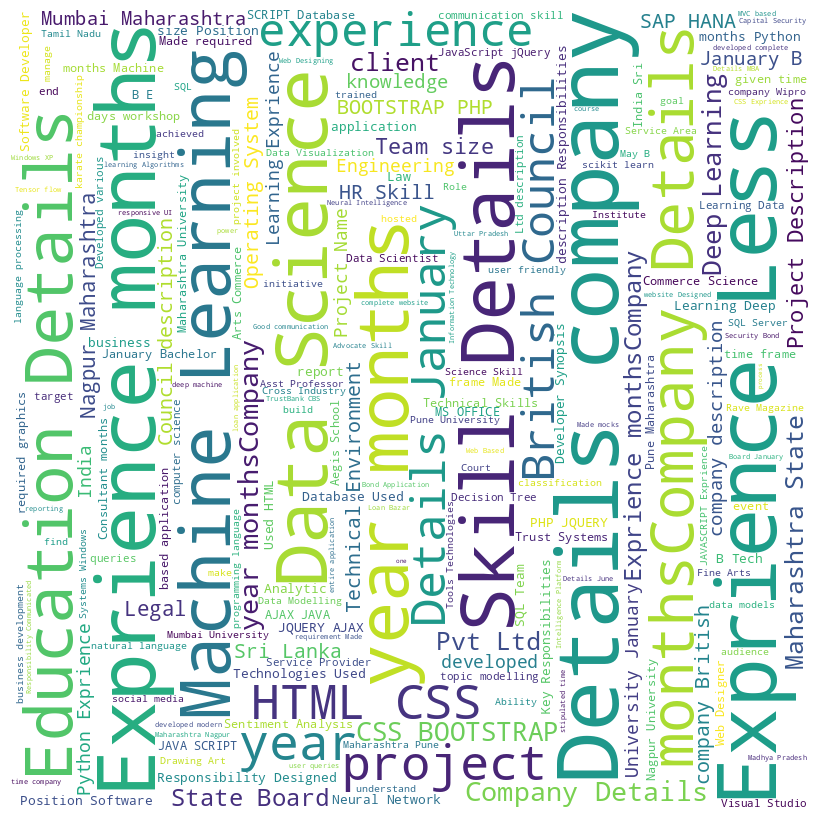

In [8]:
# Generate WordCloud
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))
cleaned_text = " ".join(resumeDataSet['cleaned_resume'][:160])
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stop_words).generate(cleaned_text)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [9]:
# Encode target labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
resumeDataSet['Category'] = le.fit_transform(resumeDataSet['Category'])

In [10]:
# Vectorization and train-test split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

requiredText = resumeDataSet['cleaned_resume'].astype(str).values
requiredTarget = resumeDataSet['Category'].values

word_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english', max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

X_train, X_test, y_train, y_test = train_test_split(WordFeatures, requiredTarget, random_state=0, test_size=0.2)

In [11]:
# Model training and evaluation
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

print('Accuracy on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(clf.score(X_test, y_test)))
print("\nClassification report:\n", metrics.classification_report(y_test, prediction))

Accuracy on training set: 0.99
Accuracy on test set: 0.99

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        1